In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(["area_type", "availability", "society"], axis=1)

In [6]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df2.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [9]:
df2.fillna({
        "balcony": df2["balcony"].median()
}, inplace=True)

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 6)

In [13]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3["bedroom"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\eugen\AppData\Local\Temp\ipykernel_24744\3084995099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bedroom"] = df3["size"].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3

,location,size,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [16]:
df3["bedroom"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df4 = df3.drop(["size"], axis=1)
df4

,location,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,0.0,231.00,5
13316,Richards Town,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [18]:
df4[df4.bedroom > 15]

,location,total_sqft,bath,balcony,price,bedroom
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,2.0,550.0,16
4684,Munnekollal,2400,40.0,0.0,660.0,43
11559,1Kasavanhalli,1200,18.0,2.0,200.0,18


In [19]:
df4["balcony"].unique()

array([1., 3., 2., 0.])

In [20]:
df4.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
bedroom         int64
dtype: object

In [21]:
df4["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [22]:
def is_float(x):
        try:
                float(x)
        except:
                return False
        return True

In [23]:
df4[~df4["total_sqft"].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bedroom
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [24]:
def convert_sqft_to_num(x):
        tokens = x.split('-')
        if len(tokens)==2:
                return (float(tokens[0]) + float(tokens[1]))/2
        try:
                return float(x)
        except:
                return None

In [25]:
convert_sqft_to_num('1234-1255')

1244.5

In [26]:
convert_sqft_to_num('1236')

1236.0

In [27]:
convert_sqft_to_num('4125Perch')

In [28]:
df5 = df4.copy()
df5["total_sqft"] = df5["total_sqft"].apply(convert_sqft_to_num)
df5.head(10)

,location,total_sqft,bath,balcony,price,bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,2.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,2.0,370.00,6


In [29]:
df5.isnull().sum()

location       0
total_sqft    46
bath           0
balcony        0
price          0
bedroom        0
dtype: int64

In [30]:
df5 = df5.dropna()
df5.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bedroom       0
dtype: int64

In [31]:
df5.dtypes

location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bedroom         int64
dtype: object

In [32]:
df5.shape

(13200, 6)

<Axes: xlabel='total_sqft', ylabel='Count'>

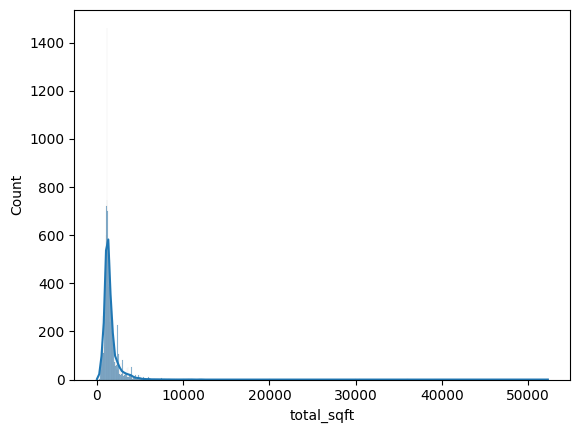

In [33]:
sns.histplot(data=df5, x="total_sqft", kde=True)

<Axes: xlabel='bath', ylabel='Count'>

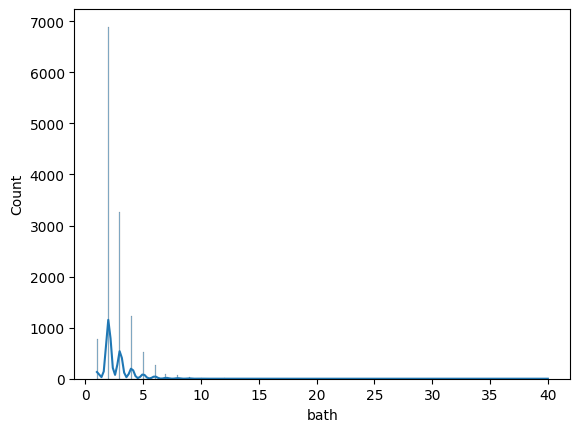

In [34]:
sns.histplot(data=df5, x="bath", kde=True)

<Axes: xlabel='balcony', ylabel='Count'>

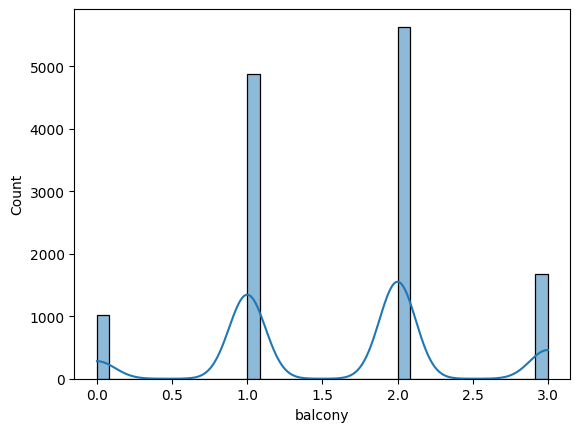

In [35]:
sns.histplot(data=df5, x="balcony", kde=True)

<Axes: xlabel='bedroom', ylabel='Count'>

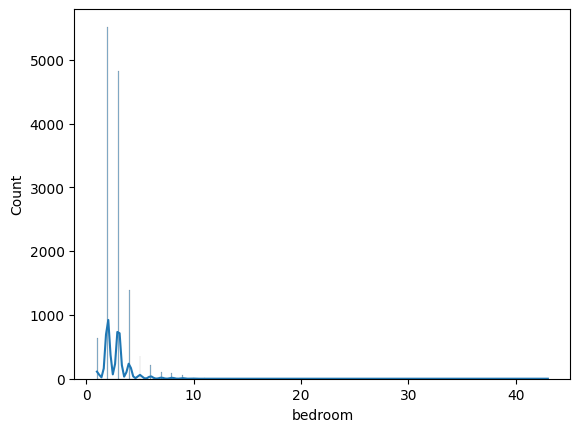

In [36]:
sns.histplot(data=df5, x="bedroom", kde=True)

<Axes: xlabel='price', ylabel='Count'>

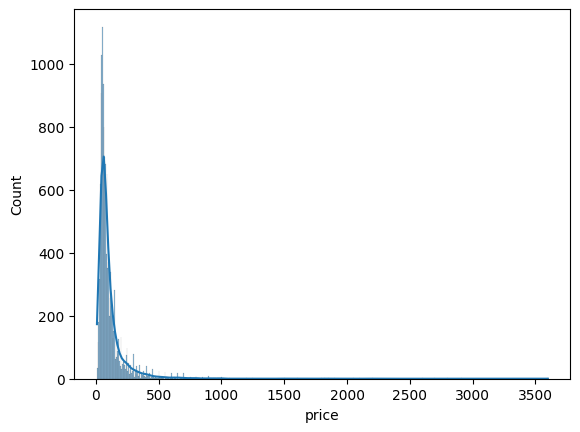

In [37]:
sns.histplot(data=df5, x="price", kde=True)

In [38]:
df6 = df5.copy()
df6["price_per_sqft"] = df6["price"]*100000 / df6["total_sqft"]
df6

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [39]:
df6[df6.total_sqft / df6.bedroom < 300]

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
9,Gandhi Bazar,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Kundalahalli Colony,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Vishwanatha Nagenahalli,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [40]:
df7 = df6[~(df6.total_sqft / df6.bedroom < 300)]
df7

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [41]:
df7 = df7[df7.bath < df7.bedroom+2] # remove rows where number of bathrooms are +2 more than number of bedroom, removing outliers due to domain knowledge

In [42]:
def remove_pps_outliers(df):
        df_out = pd.DataFrame()
        for key, subdf in df.groupby('location'):
                m = np.mean(subdf.price_per_sqft)
                st = np.std(subdf.price_per_sqft)
                reduced_df = subdf[(subdf.price_per_sqft>(m-1*st)) & (subdf.price_per_sqft<=(m+1*st))]
                df_out = pd.concat([df_out,reduced_df], ignore_index=True)
        return df_out

df8 = remove_pps_outliers(df7)
df8.shape

(9152, 7)

In [43]:
len(df8.location.unique())

763

In [44]:
df9 = df8.copy()
df9.location = df8.location.apply(lambda x: x.strip())
location_stats = df9.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                        475
Sarjapur  Road                    293
Electronic City                   278
Kanakpura Road                    188
Yelahanka                         167
                                 ... 
Yeshwanthpur Industrial Suburb      1
frazertown                          1
manyata park                        1
south                               1
1st Block BEL Layout                1
Name: location, Length: 759, dtype: int64

In [45]:
df9["location"].value_counts().sort_values(ascending=False)

location
Whitefield                        475
Sarjapur  Road                    293
Electronic City                   278
Kanakpura Road                    188
Uttarahalli                       167
                                 ... 
1st Block BEL Layout                1
Yeshwanthpur Industrial Suburb      1
frazertown                          1
manyata park                        1
south                               1
Name: count, Length: 759, dtype: int64

In [46]:
len(location_stats[location_stats<=10])

582

In [47]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Gollarapalya Hosahalli            10
Rajiv Nagar                       10
Mico Layout                       10
Cunningham Road                   10
Dasanapura                        10
                                  ..
Yeshwanthpur Industrial Suburb     1
frazertown                         1
manyata park                       1
south                              1
1st Block BEL Layout               1
Name: location, Length: 582, dtype: int64

In [48]:
df10 = df9.copy()
df10.location = df10.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df10.location.unique())

178

In [49]:
test_grouped = df10.groupby('location').size().sort_values(ascending=True)
test_grouped

location
Banashankari Stage V      11
Chikka Tirupathi          11
Chamrajpet                11
Binny Pete                11
Kaikondrahalli            11
                        ... 
Kanakpura Road           188
Electronic City          278
Sarjapur  Road           293
Whitefield               475
other                   1793
Length: 178, dtype: int64

In [50]:
df10.location.head(10)

0                  other
1                  other
2                  other
3    Devarachikkanahalli
4    Devarachikkanahalli
5    Devarachikkanahalli
6    Devarachikkanahalli
7    Devarachikkanahalli
8    Devarachikkanahalli
9    Devarachikkanahalli
Name: location, dtype: object

In [51]:
df10.describe()

,total_sqft,bath,balcony,price,bedroom,price_per_sqft
count,9152.000000,9152.000000,9152.000000,9152.000000,9152.000000,9152.000000
mean,1481.064989,2.424825,1.604786,91.099553,2.540428,5679.824060
std,856.700744,0.870495,0.783637,99.968509,0.827291,2452.953464
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1105.000000,2.000000,1.000000,48.950000,2.000000,4250.000000
50%,1277.500000,2.000000,2.000000,66.000000,2.000000,5166.666667
75%,1632.250000,3.000000,2.000000,98.000000,3.000000,6363.636364
max,30400.000000,9.000000,3.000000,2912.000000,9.000000,34995.793775


In [52]:
df10.shape

(9152, 7)

In [53]:
len(df10.location.unique())

178

In [54]:
grouped_test = df10.groupby('location')['price'].agg('mean').sort_values()
grouped_test

location
Chandapura                      26.175000
Ananth Nagar                    28.361154
Attibele                        28.759444
Anekal                          33.625000
Bommasandra Industrial Area     33.983889
                                  ...    
Iblur Village                  223.619048
Indira Nagar                   231.230769
Frazer Town                    240.360000
Malleshwaram                   266.864286
Rajaji Nagar                   287.630435
Name: price, Length: 178, dtype: float64

In [55]:
df10.head()

,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,other,1672.0,3.0,2.0,150.0,3,8971.291866
1,other,1750.0,3.0,3.0,149.0,3,8514.285714
2,other,1750.0,3.0,2.0,150.0,3,8571.428571
3,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
4,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000


In [56]:
df10.shape

(9152, 7)

Text(0, 0.5, 'Count')

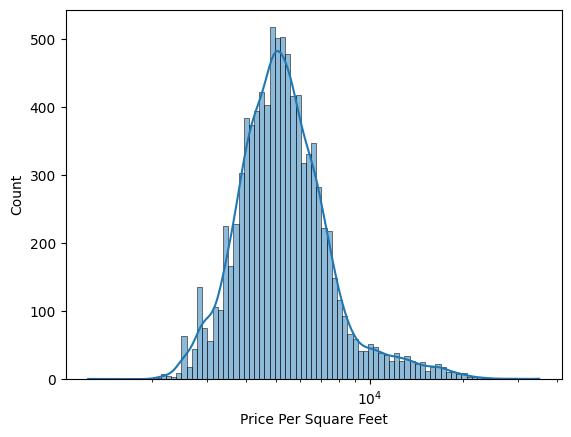

In [57]:
sns.histplot(data=df10, x="price_per_sqft", kde=True, bins='auto', log_scale=True)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

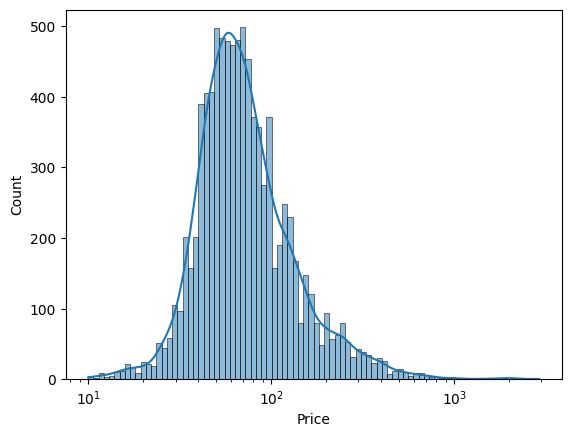

In [58]:
sns.histplot(data=df10, x="price", kde=True, bins='auto', log_scale=True)
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

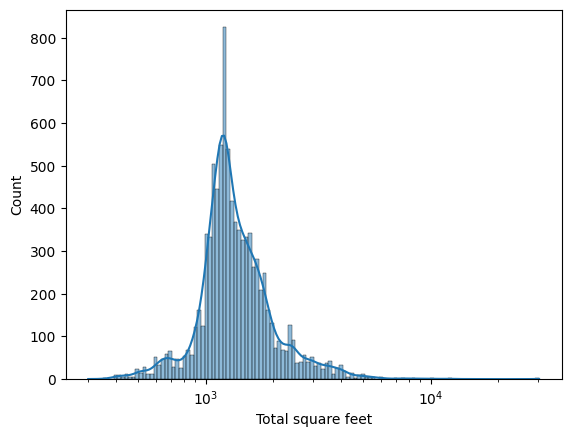

In [59]:
sns.histplot(data=df10, x="total_sqft", kde=True, bins='auto', log_scale=True)
plt.xlabel('Total square feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

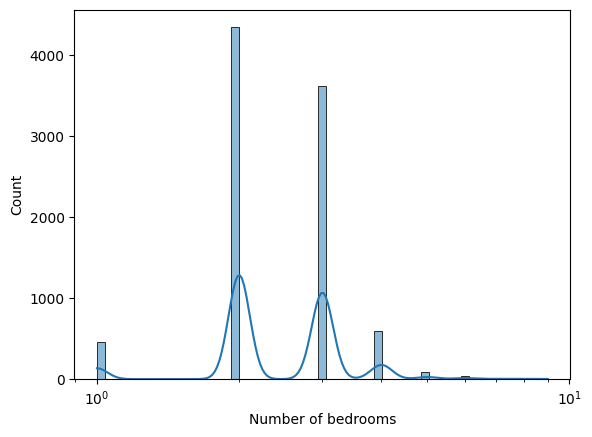

In [60]:
sns.histplot(data=df10, x="bedroom", kde=True, bins='auto', log_scale=True)
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

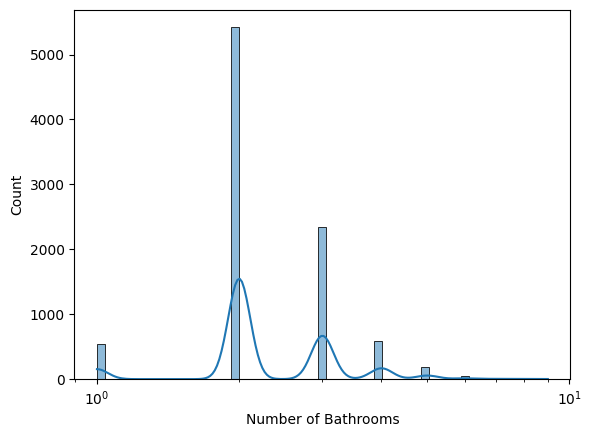

In [61]:
sns.histplot(data=df10, x="bath", kde=True, bins='auto', log_scale=True)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [62]:
df10.location.value_counts().sort_values()

location
Sector 7 HSR Layout      11
Murugeshpalya            11
Chikka Tirupathi         11
Kaikondrahalli           11
Kalyan nagar             11
                       ... 
Kanakpura Road          188
Electronic City         278
Sarjapur  Road          293
Whitefield              475
other                  1793
Name: count, Length: 178, dtype: int64

In [63]:
df10.shape

(9152, 7)

In [64]:
df11 = df10.drop(["price_per_sqft", "balcony"], axis=1)

In [65]:
df11.head()

,location,total_sqft,bath,price,bedroom
0,other,1672.0,3.0,150.0,3
1,other,1750.0,3.0,149.0,3
2,other,1750.0,3.0,150.0,3
3,Devarachikkanahalli,1250.0,2.0,44.0,3
4,Devarachikkanahalli,1250.0,2.0,40.0,2


In [66]:
dummies = pd.get_dummies(df11.location, drop_first=True)
dummies

,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9149,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9150,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [67]:
df12 = pd.concat([df11,dummies], axis=1)
df12

,location,total_sqft,bath,price,bedroom,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,other,1672.0,3.0,150.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,other,1750.0,3.0,149.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,other,1750.0,3.0,150.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Devarachikkanahalli,1250.0,2.0,44.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1250.0,2.0,40.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,other,2900.0,3.0,325.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9148,other,1780.0,3.0,84.83,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9149,other,880.0,2.0,48.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9150,other,1000.0,2.0,55.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [68]:
df13 = df12.drop(["location"], axis=1)
df13

,total_sqft,bath,price,bedroom,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1672.0,3.0,150.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1750.0,3.0,149.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1750.0,3.0,150.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1250.0,2.0,44.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1250.0,2.0,40.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9147,2900.0,3.0,325.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9148,1780.0,3.0,84.83,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9149,880.0,2.0,48.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9150,1000.0,2.0,55.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [69]:
X = df13.drop('price', axis=1)
X.head()

,total_sqft,bath,bedroom,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1672.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1750.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1750.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1250.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1250.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
y = df13.price
y.head()

0    150.0
1    149.0
2    150.0
3     44.0
4     40.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5840338457593583

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

scores = cross_val_score(LinearRegression(), X, y, cv=cv)
print(scores)
print(scores.mean())

[0.67716604 0.74309767 0.73117103 0.70196985 0.70599822]
0.711880562550009


In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [210]:
model_params = {
    'linear_regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ]),
        'params': {
            'model__fit_intercept': [True,False]
        }
    },
    'lasso': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('model', Lasso())
        ]),
        'params' : {
            'model__alpha': [0.1,1,2,5,10],
            'model__selection': ['random', 'cyclic']
        }
    },
    # 'ridge': {
    #     'model': Pipeline([
    #         ('scaler', StandardScaler()),
    #          ('model', Ridge()),
    #     ]),
    #     'params' : {
    #         'model__alpha': [0.1,1,2,5,10]
    #     }
    # },
    # 'random_forest': {
    #     'model': RandomForestRegressor(random_state=42),
    #     'params' : {
    #         'n_estimators': [50,100],
    #         'criterion': ["squared_error"]
    #     }
    # },
    # "decision_trees": {
    #     "model": DecisionTreeRegressor(random_state=42),
    #     "params": {
    #          "criterion": ['squared_error'],
    #          "splitter": ["best", "random"],
    #          "max_depth": [5,10,20, None]    
    #     }
    # }
}

scores = []
best_models = {}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for model_name, model_parameters in model_params.items():
    clf =  GridSearchCV(model_parameters['model'], model_parameters['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    best_models[model_name] = clf.best_estimator_
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df



,model,best_score,best_params
0,linear_regression,0.711881,{'model__fit_intercept': True}
1,lasso,0.711791,"{'model__alpha': 0.1, 'model__selection': 'ran..."


In [211]:
best_model_name = df.sort_values('best_score', ascending=False).iloc[0]['model']
best_model = best_models[best_model_name]
best_model

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [212]:
df[df['model']=="random_forest"].best_params.values

array([], dtype=object)

In [213]:
df[df['model']=="decision_trees"].best_params.values

array([], dtype=object)

In [214]:
X.columns

Index(['total_sqft', 'bath', 'bedroom', '5th Phase JP Nagar',
       '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar',
       '9th Phase JP Nagar', 'Abbigere', 'Akshaya Nagar',
       ...
       'Varthur', 'Vidyaranyapura', 'Vijayanagar', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yeshwanthpur',
       'other'],
      dtype='object', length=180)

In [215]:
def predict_price(location,sqft,bath,bedroom):
        loc_index = np.where(X.columns==location)[0][0]
        
        x = np.zeros(len(X.columns))
        x[0] = sqft
        x[1] = bath
        x[2] = bedroom
        if loc_index >=0:
                x[loc_index] = 1
        return best_model.predict([x])[0]

In [228]:
float(predict_price('Indira Nagar', 1000, 2, 2))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


156.53092637109154

In [229]:
float(predict_price('other', 1000, 2, 2))

c:\Users\eugen\Desktop\Repo\General Python Exercises\eugen-venv-test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


69.74605279773976